In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
a = pd.read_csv('../houses_value/housing.csv')

In [5]:
a.head(), a.info(), a.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 None,
 (20640, 10))

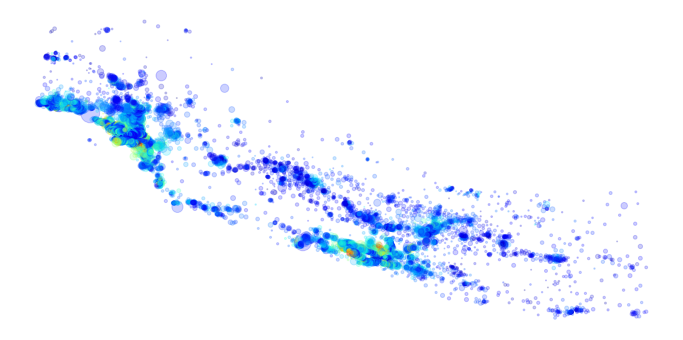

In [26]:
plt.figure(figsize = [12,6])
plt.scatter(x = a['latitude'], y = a['longitude'], alpha = 0.2, c = a['median_income'], cmap = plt.cm.get_cmap('jet'), s = a['population']//100)
plt.axis('off')
plt.show()

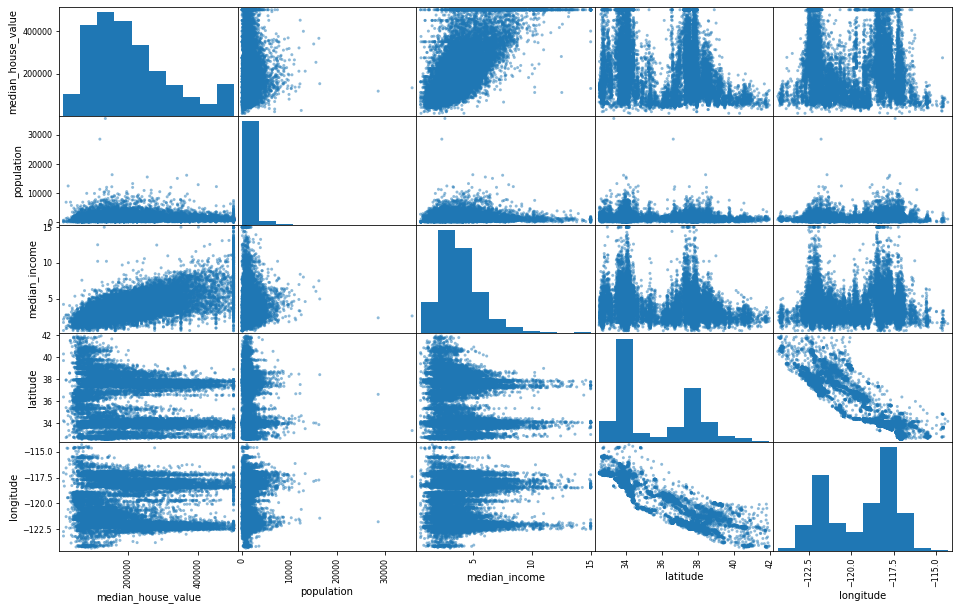

In [27]:
atributes = ['median_house_value','population','median_income','latitude', 'longitude']
scatter_matrix(a[atributes], figsize=[16,10])
plt.show()

In [28]:
a[~pd.notna(a['total_bedrooms'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [29]:
b = a.index[~pd.notna(a['total_bedrooms'])]
b.values

array([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,
        1493,  1606,  2028,  2115,  2301,  2323,  2334,  2351,  2412,
        2420,  2578,  2608,  2647,  2826,  3024,  3328,  3354,  3376,
        3482,  3485,  3529,  3721,  3778,  3912,  3921,  3958,  4043,
        4046,  4186,  4279,  4309,  4391,  4447,  4496,  4591,  4600,
        4629,  4667,  4691,  4738,  4743,  4744,  4767,  4852,  5059,
        5216,  5222,  5236,  5654,  5665,  5678,  5723,  5751,  5990,
        6052,  6068,  6220,  6241,  6253,  6298,  6421,  6541,  6590,
        6814,  6835,  6962,  7097,  7113,  7168,  7191,  7228,  7316,
        7330,  7547,  7654,  7668,  7763,  7806,  8337,  8383,  8530,
        8915,  9149,  9571,  9620,  9622,  9814,  9845,  9877,  9942,
        9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761,
       10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741,
       12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336,
       13597, 13656,

In [30]:
median = a['total_bedrooms'].median()
median

435.0

In [31]:
a['total_bedrooms'].fillna(median, inplace = True)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
corr_matrix = a.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [33]:
num_op = a['ocean_proximity'].factorize()
num_op

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object'))

In [34]:
a_numb = a.drop('ocean_proximity', axis = 1)
a_numb['ocean_proximity'] = num_op[0]

In [35]:
a_numb['ocean_proximity'].unique()

array([0, 1, 2, 3, 4])

In [36]:
x = a.drop('median_house_value', axis = 1)
y = a['median_house_value']
x.info(), y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


(None, 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [38]:
[i.shape for i in [x_train, x_test, y_train, y_test]]

[(14448, 9), (6192, 9), (14448,), (6192,)]

In [39]:
ESTIMATORS = {
    'tree':DecisionTreeClassifier(),
    'neighbors':KNeighborsClassifier(),
    #'trees':ExtraTreesClassifier()
}

In [40]:
test_fact = x_test['ocean_proximity'].factorize()[0]
train_fact = x_train['ocean_proximity'].factorize()[0]
x_test['ocean_proximity'] = test_fact
x_train['ocean_proximity'] = train_fact

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
y_pred = dict()
ESTIMATORS['tree'].fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
ESTIMATORS['neighbors'].fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred['tree'] = ESTIMATORS['tree'].predict(x_test)
y_pred['neighbors'] = ESTIMATORS['neighbors'].predict(x_test)

In [45]:
results = pd.DataFrame(y_pred, columns=[name for name, i in ESTIMATORS.items()])
#results.drop('trees', axis = 1, inplace = True)
results

,tree,neighbors
0,95800.0,42500.0
1,178400.0,89200.0
2,500001.0,500001.0
3,228900.0,227900.0
4,500001.0,69700.0
...,...,...
6187,95000.0,67000.0
6188,158800.0,90400.0
6189,159100.0,88800.0
6190,168900.0,95000.0


In [ ]:
results['original'] = y_test
y_test

In [51]:
os.getcwd()
os.chdir('/home/hacktone')
os.getcwd()

'/home/hacktone'

In [52]:
import os
os.chdir(os.getcwd())
for i,j,k in os.walk(os.getcwd()):
    print(j)

['git', 'Документы', 'scikit_learn_data', '.keras', '.gnupg', '.ipython', '.local', 'Шаблоны', 'Видео', '.config', 'Музыка', 'snap', 'Загрузки', '.jupyter', 'anaconda3', '.cache', '.ipynb_checkpoints', 'myenv', '.mozilla', '.ssh', 'Изображения', 'Общедоступные', 'hacktone', 'Рабочий стол', '.conda']
['gitweb', 'mergetools', 'builtin', 'negotiator', 't', '.git', 'perl', 'po', '.github', 'sha1collisiondetection', 'sha1dc', 'gitk-git', 'Documentation', 'compat', 'ci', 'trace2', 'ppc', 'refs', 'xdiff', 'sha256', 'block-sha1', 'contrib', 'templates', 'vcs-svn', 'ewah', 'git-gui']
['static']
['js']
['lib']
[]
[]
[]
[]
['t7519', 't9161', 't0019', 't3434', 't7505', 't3901', 't9110', 't5515', 't4100', 't8005', 't9154', 't3206', 'oid-info', 't9151', 't9700', 't5562', 'helper', 't0210', 't9604', 't0202', 'perf', 't9111', 'lib-gpg', 't4034', 't5000', 'Git-SVN', 't4211', 't4135', 't4101', 't9603', 't3900', 't4018', 't9350', 't0200', 't0021', 't5004', 't4252', 't9135', 't0110', 't5100', 'interop', '

['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['qt_editor', '__pycache__', 'web_backend']
['__pycache__']
[]
[]
['js', 'css', 'jquery', 'jquery-ui-1.12.1']
[]
[]
['js']
[]
['external', 'images']
['jquery']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['tinypages', '__pycache__']
['__pycache__', '_static']
[]
[]
[]
['__pycache__', 'jpl_units']
[]
['__pycache__']
[]
['sample_data', 'stylelib', 'images', 'fonts']
['axes_grid']
[]
[]
[]
['ttf', 'pdfcorefonts', 'afm']
[]
[]
[]
[]
['__pycache__', 'wrappers', 'debug', 'contrib', 'middleware']
[]
['__pycache__']
[]
['__pycache__', 'shared']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__', 'python', 'contrib', '_api']
[]
['estimator', '__pycache__']
['canned', 'head', 'hooks', '__pycache__', 'export', 'inputs', 'api', 'tpu']
['__pycache__', 'linear_optimizer', 'v1', 'timeseries']
[]
['__pycache__', 'python']
[]
['utils', '__pycache__']
['__pycache__']
[

['__pycache__', 'writer']
[]
['__pycache__']
[]
['losses', '__pycache__', 'ragged', 'parallel_for', 'distributions', 'linalg', 'signal']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['canned', '__pycache__', 'export', 'inputs']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'queues']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['impl', 'utils', '__pycache__', 'pyct', 'lang', 'core', 'operators', 'converters']
['__pycache__']
[]
['__pycache__']
[]
[]
['static_analysis', '__pycache__', 'common_transformers', 'testing']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'protobuf']
[]
['__pycache__']
[]
['__pycache__', 'experimental', 'cluster_resolver', 'model_collection']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'ran

['ops', '__pycache__', 'python']
['__pycache__']
[]
[]
['ops', '__pycache__']
['__pycache__']
[]
[]
['ops', '__pycache__', 'python']
['__pycache__']
[]
[]
['ops', 'layers', '__pycache__']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__', 'python']
[]
['ops', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'python']
[]
['__pycache__', 'util']
[]
['__pycache__']
[]
['__pycache__', 'python']
[]
['ops', '__pycache__', 'kernel_tests']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'python']
[]
['ops', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'python']
[]
['__pycache__']
[]
['__pycache__', 'python']
[]
['losses', '__pycache__', 'metric_learning']
['__pycache__']
[]
[]
['__pycache__']
[]
['ops', '__pycache__', 'python']
['__pycache__']
[]
[]
['ops', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'python']
[]
['estimator', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'python']
[]
['layers', '__pycache__']
['_

['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__', 'experimental', 'cluster_resolver']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'gfile']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__', 'threading', 'experimental', 'optimizer']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]


['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'numpy']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['ops', 'groupby', '__pycache__', 'sparse', 'internals', 'util', 'tools', 'dtypes', 'computation', 'arrays', 'reshape', 'indexes', 'window']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'sparse']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tslibs', 'window']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'indexers', 'types', 'extensions']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['beta', '__pycache__', 'experimental', 'framework', '_cython']
['__pycache__']
[]
[]
['__pycache__', 'aio']
[]
['__pycache__']
[]
['foundation', '__pycache__', 'common', 'interfaces']
['__pycache__']
[]
[]
['__pycache__']
[]
['__p

['index-dir']
[]
[]
['4aa3047a7fce1b4e406223a914946cc624e679b0', '10ef7fcf8d2111df6a60c7a58e52c23799eca8a0', '9efe576354b6de6ea2773e17f57a29652e31ac5b']
['87b78bae-78d3-41a0-865e-ddc385b69a2d']
['index-dir']
[]
['8704fb1f-3a12-4936-bc42-f1fb3d73d77f']
['index-dir']
[]
['cef6df84-f784-4012-8139-525ee31c3ca8']
['index-dir']
[]
[]
[]
['AvailabilityDB', 'EventDB']
[]
[]
[]
['pkedcjkdefgpdelpbcmbmeomcjbeemfm']
['8019.1111.0.0_0']
['cast_setup', '_metadata', '_locales']
[]
[]
['te', 'tr', 'de', 'es', 'da', 'hi', 'en', 'vi', 'nb', 'hr', 'uk', 'sr', 'id', 'ta', 'lt', 'hu', 'pt', 'ms', 'mr', 'ko', 'ar', 'et', 'ca', 'ja', 'sl', 'fi', 'sw', 'el', 'zh', 'iw', 'zh_TW', 'ro', 'sk', 'bg', 'it', 'bn', 'fa', 'nl', 'cs', 'gu', 'lv', 'ru', 'kn', 'fil', 'fr', 'th', 'ml', 'am', 'pl', 'sv']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['leveldb']
[]
['LevelDB']
[]
['7']
['_metadata']
[]
[]
['2']
['

['5.9.7']
['Qt3DCore']
['private']
[]
['5.9.7']
['QtFontDatabaseSupport']
['private']
[]
['5.9.7']
['QtPacketProtocol']
['private']
[]
['5.9.7']
['QtQmlDebug']
['private']
[]
['5.9.7']
['Qt3DQuickRender']
['private']
[]
['5.9.7']
['QtHelp']
['private']
[]
['5.9.7']
['QtDesigner']
['private']
[]
['5.9.7']
['QtSql']
['private']
[]
['5.9.7']
['QtWebEngine']
['private']
[]
[]
[]
[]
[]
['internal', 'greenlet']
[]
[]
[]
['sysroot']
['lib']
[]
[]
['misc']
[]
['tf-gpu', 'tf']
['var', 'mkspecs', 'conda-meta', 'include', 'x86_64-conda_cos6-linux-gnu', 'resources', 'ssl', 'phrasebooks', 'etc', 'lib', 'plugins', 'qml', 'libexec', 'doc', 'bin', 'compiler_compat', 'translations', 'share']
['cache']
['fontconfig']
[]
['linux-lsb-g++', 'android-g++', 'android-clang', 'dummy', 'integrity-x86', 'linux-clang', 'solaris-g++', 'winrt-arm-msvc2015', 'darwin-g++', 'openbsd-g++', 'win32-msvc', 'netbsd-g++', 'aix-g++-64', 'winrt-x64-msvc2015', 'linux-g++', 'qnx-x86-64-qcc', 'qnx-x86-qcc', 'linux-icc-32', 'hurd

[]
['5.9.7']
['Qt3DCore']
['private']
[]
['5.9.7']
['QtFontDatabaseSupport']
['private']
[]
['5.9.7']
['QtPacketProtocol']
['private']
[]
['5.9.7']
['QtQmlDebug']
['private']
[]
['5.9.7']
['Qt3DQuickRender']
['private']
[]
['5.9.7']
['QtHelp']
['private']
[]
['5.9.7']
['QtDesigner']
['private']
[]
['5.9.7']
['QtSql']
['private']
[]
['5.9.7']
['QtWebEngine']
['private']
[]
[]
[]
['protobuf']
['util', 'stubs', 'io', 'compiler']
[]
[]
[]
['csharp', 'php', 'js', 'python', 'objectivec', 'java', 'cpp', 'ruby']
[]
[]
[]
[]
[]
[]
[]
[]
['internal']
[]
[]
['sysroot']
['lib']
[]
[]
['misc']
[]
[]
['jupyter', 'dbus-1', 'fonts']
['nbconfig']
['notebook.d']
[]
[]
['conf.d']
[]
['tdbcpostgres1.0.6', 'tcl8.6', 'terminfo', 'gstreamer-1.0', 'thread2.8.2', 'engines-1.1', 'sqlite3.21.0', 'icu', 'pkgconfig', 'dbus-1.0', 'tdbcodbc1.0.6', 'tdbcmysql1.0.6', 'gettext', 'python3.7', 'tdbc1.0.6', 'girepository-1.0', 'glib-2.0', 'tk8.6', 'cmake', 'tcl8', 'itcl4.1.1']
[]
['msgs', 'http1.0', 'opt0.4', 'encoding']


['aspectratio', '__pycache__', 'camera', 'xaxis', 'yaxis', 'zaxis', 'annotation', 'domain']
['__pycache__']
[]
[]
['up', '__pycache__', 'eye', 'center', 'projection']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__', 'hoverlabel']
['__pycache__']
[]
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['font', '__pycache__', 'title']
['__pycache__']
[]
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['font', '__pycache__',

['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'marker', 'stream', 'hoverlabel']
[]
['__pycache__', 'border']
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['spaceframe', 'surface', '__pycache__', 'lighting', 'stream', 'colorbar', 'hoverlabel', 'caps', 'contour', 'lightposition', 'slices']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'z', 'x', 'y']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'z', 'x', 'y']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'labelfont', 'stream', 'dimension', 'line', 'tickfont', 'domain']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycach

[]
[]
['__pycache__']
[]
[]
['__pycache__', 'gradient', 'colorbar', 'line']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['textfont', '__pycache__', 'marker']
['__pycache__']
[]
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'labelfont', 'stream', 'dimension', 'line', 'rangefont', 'tickfont', 'domain']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'colorbar']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['selected', '__pycache__', 'marker', 'stream', 'unselected', 'hoverlabel', 'line']
['__pycache__', 'marker']
[]
['__pycache__']
[]
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
['__pycache_

[]
['selected', '__pycache__', 'marker', 'unselected', 'hoverlabel']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['summary', '_vendor', '__pycache__', 'util', 'compat', 'plugins', 'data', 'backend']
['__pycache__', 'writer', '_tf']
[]
['__pycache__']
[]
['summary', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'tensorflow_serving', 'bleach', 'html5lib', 'webencodings']
[]
['apis', '__pycache__', 'util', 'sources', 'config']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'storage_path']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'treebuilders', 'treeadapters', 'treewalkers', '_trie', 'filters']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['proto', '__pycache__', 'tensorflow_stub']
['__pycache__']
[]
[]
['__pycache__', 'io', 'compat']
[]
['__pycache__']
[]
['__pycache__', 'v1']
[]
['__pycache

['metrics', 'activations', 'initializers', 'layers', 'utils', 'losses', 'callbacks', 'applications', 'estimator', '__pycache__', 'regularizers', 'models', 'datasets', 'wrappers', 'experimental', 'constraints', 'optimizers', 'premade', 'mixed_precision', 'preprocessing', 'backend']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['inception_v3', 'resnet50', 'mobilenet_v2', '__pycache__', 'mobilenet', 'vgg16', 'resnet', 'xception', 'vgg19', 'inception_resnet_v2', 'densenet', 'imagenet_utils', 'resnet_v2', 'nasnet']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['fashion_mnist', '__pycache__', 'reuters', 'cifar1

['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'threading', 'experimental', 'optimizer']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['microfrontend', '__pycache__']
['__pycache__', 'python']
[]
['ops', '__pycache__']
['__pycache__']
[]
[]
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__', 'threading', 'experimental', 'optimizer']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycach

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['8.5', '8.4', '8.6']
[]
['platform']
[]
['tdbc']
[]
[]
['generic', 'playlistformats', 'audio', 'renderplugins', 'sqldrivers', 'imageformats', 'bearer', 'egldeviceintegrations', 'gamepads', 'sensorgestures', 'mediaservice', 'canbus', 'PyQt5', 'platforms', 'iconengines', 'geoservices', 'designer', 'geometryloaders', 'qmltooling', 'printsupport', 'sensors', 'xcbglintegrations', 'platforminputcontexts', 'sceneparsers', 'position']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['QtLocation', 'QtPurchasing', 'Qt', 'QtWebView', 'QtCanvas3D', 'QtQuick', 'QtCharts', 'QtGamepad', 'QtPositioning', 'QtMultimedia', 'QtDataVisualization', 'QtGraphicalEffects', 'QtQml', 'QtWebSockets', 'QtTest', 'QtBluetooth', 'QtSensors', 'QtWebChannel', 'QtNfc', 'QtQuick.2', 'QtScxml', 'Qt3D', 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['mac', 'aix', 'integrity', 'c89', 'bsd', 'android', 'winrt_winphone', 'uikit', 'qnx', 'posix', 'nacl']
[]
[]
[]
[]
[]
[]
['assets', 'manifests']
[]
['10.0']
[]
['GLES2']
[]
[]
[]
[]
['linux-imx53qsb-g++', 'linux-rasp-pi-g++', 'freebsd-generic-clang', 'linux-arm-amlogic-8726M-g++', 'linux-imx7-g++', 'linux-rcar-h2-g++', 'integrity-armv8-msm8996au', 'linux-drive-cx-g++', 'linux-nuc-g++', 'linux-rasp-pi3-vc4-g++', 'linux-odroid-xu3-g++', 'linux-rasp-pi2-g++', 'linux-rasp-pi3-g++', 'linux-arm-hisilicon-hix5hd2-g++', 'common', 'linux-jetson-tx1-g++', 'linux-sh4-stmicro-ST7108-g++', 'linux-jetson-tk1-g++', 'linux-mipsel-broadcom-97425-g++', 'linux-mipsel-ci20-g++', 'linux-colibri-vf-g++', 'freebsd-rasp-pi-clang', 'linux-emu-g++', 'linux-arm-trident-pnx8473-g++', 'linux-arm-generic-g++', 'linux-archos-gen8-g++', 'integrity-armv8-drive-cx', 'linux-imx6-g++', 'linux-sh4-stmicro-ST7540-g++', 'linux-beagleboard-g++', 'lin

['__pycache__', 'colorbar', 'line']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['textfont', '__pycache__', 'marker']
['__pycache__']
[]
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'marker', 'xbins', 'stream', 'colorbar', 'hoverlabel', 'ybins', 'contours', 'line']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'labelfont']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'lighting', 'stream', 'colorbar', 'hoverlabel', 'contour', 'lightposition']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', 

['textfont', 'decreasing', '__pycache__', 'stream', 'outsidetextfont', 'hoverlabel', 'insidetextfont', 'increasing', 'totals', 'connector']
['__pycache__']
[]
['__pycache__', 'marker']
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'marker']
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
['__pycache__', 'marker']
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
['textfont', '__pycache__', 'marker', 'title', 'stream', 'outsidetextfont', 'hoverlabel', 'insidetextfont', 'domain']
['__pycache__']
[]
[]
['__pycache__', 'line']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['header', '__pycache__', 'stream', 'hoverlabel', 'cells', 'domain']
['fill', 'font', '__pycache__', 'line']
[

[]
['__pycache__', 'lighting', 'stream', 'colorbar', 'hoverlabel', 'lightposition', 'starts']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['spaceframe', 'surface', '__pycache__', 'lighting', 'stream', 'colorbar', 'hoverlabel', 'caps', 'contour', 'lightposition', 'slices']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'title', 'tickformatstop', 'tickfont']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['font', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'z', 'x', 'y']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'z', 'x', 'y']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['textfont', '__p

['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'line']
[]
['__pycache__', 'colorbar']
[]
['__pycache__', 'title']
[]
['__pycache__']
[]
['selected', '__pycache__', 'marker', 'unselected', 'hoverlabel']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['sentiment', 'translate', 'metrics', 'stem', 'corpus', 'classify', 'chat', 'chunk', '__pycache__', 'inference', 'tbl', 'app', 'twitter', 'sem', 'ccg', 'parse', 'test', 'tag', 'cluster', 'misc', 'lm', 'tokenize', 'draw']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'reader']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'unit']
[]
['translate', '__pycache__', 'lm']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__'

[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'protobuf']
[]
['__pycache__']
[]
['__pycache__', 'experimental', 'cluster_resolver', 'model_collection']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'random', 'signal']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'api']
[]
['__pycache__', 'generator']
[]
['__pycache__']
[]
['engine', 'layers', 'utils', 'applications', 'estimator', '__pycache__', 'distribute', 'datasets', 'wrappers', 'optimizer_v2', 'saving', 'premade', 'mixed_precision', 'api', 'preprocessing']
['__pycache__']
[]
['__pycache__', 'preprocessing']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'saved_model']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__', 'keras', '_v2', '_v1']
[]
['metrics', 'ac

['__pycache__', 'experimental', 'cluster_resolver']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'rnn_cell']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'gfile']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['loader', 'utils', 'signature_constants', 'signature_def_utils', '__pycache__', 'builder', 'main_op', 'experimental', 'tag_constants', 'constants']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]

['include']
[]
['msgs', 'demos', 'ttk', 'images']
[]
['images']
[]
[]
[]
['Qt53DRender', 'Qt5QuickControls2', 'Qt5Concurrent', 'Qt5NetworkAuth', 'Qt5Nfc', 'Qt5LinguistTools', 'Qt5Gui', 'Qt53DInput', 'Qt53DQuickAnimation', 'Qt5Widgets', 'Qt5Core', 'Qt5', 'Qt5WebChannel', 'Qt5ScriptTools', 'Qt5RemoteObjects', 'Qt5Quick', 'Qt5OpenGL', 'Qt5WebEngineCore', 'Qt5Purchasing', 'Qt5TextToSpeech', 'Qt5WebEngineWidgets', 'Qt53DQuick', 'Qt5DataVisualization', 'Qt53DQuickScene2D', 'Qt53DQuickRender', 'Qt5UiPlugin', 'Qt53DAnimation', 'Qt5SerialBus', 'Qt5Help', 'Qt5WebSockets', 'Qt5UiTools', 'Qt5QuickTest', 'DBus1', 'Qt5PrintSupport', 'Qt53DQuickInput', 'Qt5Positioning', 'Qt5XmlPatterns', 'Qt5Designer', 'Qt53DCore', 'Qt5WebView', 'Qt5Test', 'Qt5X11Extras', 'Qt5Charts', 'Qt5Svg', 'libxml2', 'Qt53DExtras', 'Qt5QuickWidgets', 'c-ares', 'Qt5RepParser', 'Qt5DBus', 'Qt5Gamepad', 'Qt53DQuickExtras', 'Qt5Xml', 'Qt5Sql', 'Qt5Location', 'Qt5SerialPort', 'Qt5Script', 'Qt5WebEngine', 'Qt5Network', 'Qt53DLogic', '

[]
[]
[]
[]
['__pycache__']
[]
[]
['sentiment', 'translate', 'metrics', 'stem', 'corpus', 'classify', 'chat', 'chunk', '__pycache__', 'inference', 'tbl', 'app', 'twitter', 'sem', 'ccg', 'parse', 'test', 'tag', 'cluster', 'misc', 'lm', 'tokenize', 'draw']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'reader']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'unit']
[]
['translate', '__pycache__', 'lm']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['inprocess', '__pycache__', 'pylab', 'gui', 'tests', 'resources', 'comm']
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pyc

[]
['__pycache__', 'data']
[]
[]
['__pycache__']
[]
[]
['__pycache__', 'tests', 'data']
[]
['__pycache__']
[]
[]
['__pycache__', 'tests']
[]
['__pycache__', 'data']
[]
[]
[]
['__pycache__', 'python', '_api']
[]
['estimator', '__pycache__']
['canned', 'head', 'hooks', '__pycache__', 'export', 'tools', 'inputs', 'api', 'tpu']
['__pycache__', 'linear_optimizer', 'v1', 'timeseries']
[]
['__pycache__', 'python']
[]
['utils', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'queues']
[]
['__pycache__']
[]
['__pycache__', '_v2', '_v1']
[]
['estimator', '__pycache__']
['__pycache__', 'export', 'experimental', 'inputs']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['estimator', '__pycache__']
['__pycache__', 'export', 'experimental', 'inputs', 'tpu']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__'

['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
[]
[]
['locales', '__pycache__', 'templates']
['zh_CN', 'tr', 'de', 'es', 'da', 'si', 'hi', 'vi', 'sr@latin', 'hr', 'he', 'sr', 'id', 'ta', 'lt', 'hu', 'pt', 'cak', 'ko', 'ar', 'nb_NO', 'et', 'cy', 'pt_PT', 'ca', 'ja', 'sl', 'ne', 'fi', 'el', 'sr_RS', 'zh_TW', '.tx', 'ro', 'sk', 'pt_BR', 'it', 'bn', 'fa', 'nl', 'eo', 'cs', 'lv', 'ru', 'ur', 'eu', 'fr', 'mk', 'uk_UA', 'pl', 'sv', 'hi_IN']
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[

['stream_executor', 'include', 'core']
['rocm', 'cuda', 'gpu', 'platform', 'lib', 'host']
[]
[]
[]
['default']
[]
[]
[]
['external']
['eigen_archive']
[]
['common_runtime', 'grappler', 'util', 'platform', 'lib', 'graph', 'public', 'example', 'framework', 'protobuf']
['gpu']
[]
['utils', 'clusters', 'verifiers', 'costs', 'optimizers']
[]
[]
[]
[]
[]
['sparse']
[]
['s3', 'cloud', 'hadoop', 'profile_utils', 'default']
[]
[]
[]
[]
[]
['strings', 'wav', 'gtl', 'monitoring', 'histogram', 'io', 'random', 'math', 'bfloat16', 'core', 'hash']
[]
[]
['subtle']
[]
[]
[]
['snappy']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['data']
['experimental']
[]
['eigen3']
['Eigen', 'unsupported']
[]
['Eigen']
['CXX11']
['src']
['FixedPoint']
[]
['gast_archive', 'boringssl', 'highwayhash', 'png', 'gif', 'farmhash_archive', 'com_github_googlecloudplatform_google_cloud_cpp', 'double_conversion', 'enum34_archive', 'local_config_sycl', 'functools32_archive', 'absl_py', 'com_googlesource_code_re2', 'curl', 'pcre', 'icu', 'aws

[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['fashion_mnist', '__pycache__', 'reuters', 'cifar10', 'cifar100', 'mnist', 'imdb', 'boston_housing']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'scikit_learn']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'schedules']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['sequence', 'text', '__pycache__', 'image']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'memory_tests']
[]
['__pycache__']
[]
['__pycache__', 'wrappers', 'lib', 'cli', 'examples']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'v2'

['__pycache__']
[]
[]
[]
[]
['html', '__pycache__', 'includes', 'isoschematron']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'resources']
[]
['xsl', 'rng']
['iso-schematron-xslt1']
[]
[]
['__pycache__', 'tests', 'scripts', 'misc', 'nodes']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
[]
[]
[]
[]
[]
['__pycache__']
[]
[]
['__pycache__']
[]
[]
[]
[]
['ext', '__pycache__']
['__pycache__']
[]
[]
[]
[]
[]
['__pycache__']
[]
['__pycache__', 'curried', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
[]
[]
['__pycache__']
[]
[]
['__pycache__']
[]
[]
[]
[]
[]
['__pycache__']
[]
[]
[]
['__pycache__']
[]
[]
[]
[]
[]
['utils', 'builtins', '__pycache__', 'standard_library', 'types', 'tests', 'backports', 'moves']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['html', '__pycache__', 'http', 'email', 'urllib', 'test', 'xmlrpc']
['

['__pycache__']
[]
['__pycache__']
[]
['pytables', 'formats', '__pycache__', 'sas', 'json', 'excel', 'parser']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['frequencies', '__pycache__', 'holiday', 'offsets']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'cast']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'sparse', 'string_', 'categorical', 'interval']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'multiindex', 'interval']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'merge']
[]
['__pycache__']
[]
['__pycache__', 'methods', 'indexing']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['period', 'ranges', 'multi', 'datetimes', '__pycache__', 'categorical', 'interval', 'timedeltas']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycac

[]
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['transforms', 'ext', 'environment', 'cmd', 'domains', 'themes', '__pycache__', 'pycode', 'texinputs', 'writers', 'util', 'search', 'builders', 'texinputs_win', 'templates', 'testing', 'directives', 'locale']
['post_transforms', '__pycache__']
['__pycache__']
[]
[]
['napoleon', '__pycache__', 'autodoc', 'autosummary']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'templates']
[]
['autosummary']
[]
['collectors', '__pycache__', 'adapters']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['basic', 'nonav', 'haiku', 'pyramid', 'classic', 'epub', 'scrolls', 'traditional', 'nature', 'agogo', 'bizstyle', 'default', 'sphinxdoc']
['static', 'changes']
[]
[]
['static']
[]
['static']
[]
['static']
[]
['static']
[]
['static']
[]
['static', 'artwork']
[]
[]
['static']
[]
['static']
[]
['static']
[]
['static']
[]
['static']
[]
['static']
[]
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'stemmer']


['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__', 'data']
[]
[]
['cython_optimize', '_trustregion_constr', '_trlib', '__pycache__', 'tests', 'lbfgsb_src', '_lsq', '_shgo_lib']
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['csgraph', '__pycache__', 'tests', 'linalg']
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__', 'data']
[]
[]
['dsolve', 'isolve', '__pycache__', 'tests', 'eigen']
['__pycache__', 'SuperLU', 'tests']
[]
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'lobpcg', 'arpack']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'ARPACK']
[]
['__pycache__']
[]
[]
['__pycache__', 'tests']
[]
['__pycache__', 'data']
[]
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'qhull_src', 'transform']
[]
['__pycache__', '

['__pycache__']
[]
['__pycache__', 'util']
[]
['__pycache__']
[]
['_vendor', '__pycache__']
['boltons', '__pycache__']
['__pycache__']
[]
[]
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'pkg_formats', '_os']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'disk', 'connection']
[]
['__pycache__']
[]
['__pycache__', 'adapters']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['etc', 'Scripts', 'condabin', 'Library', 'bin']
['profile.d', 'fish']
[]
['conf.d']
[]
[]
[]
['bin']
[]
[]
['__pycache__']
[]
[]
[]
['emplike', 'resampling', 'regression', '__pycache__', 'tsa', 'duration', 'imputation', 'gam', 'nonparametric', 'sandbox', 'base', 'interface', 'stats', 'datasets', 'tools', 'iolib', 'tests', 'compat', 'robust', 'distributions', 'multivariate', 'src', 'graphics', 'formula', 'genmod', 'discrete', 'miscmodels']
['__pycache__', 'tests']
[]
['__pycache__', 'results']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
[

['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'support']
[]
['__pycache__']
[]
['__pycache__', 'scripts']
[]
['common', 'posix']
[]
[]
['__pycache__']
[]
['macholib', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'command']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
[]
['include']
[]
['msgs', 'demos', 'ttk', 'images']
[]
['images']
[]
[]
[]
['Qt53DRender', 'Qt5QuickControls2', 'Qt5Concurrent', 'Qt5NetworkAuth', 'Qt5Nfc', 'Qt5LinguistTools', 'Qt5Gui', 'Qt53DInput', 'Qt53DQuickAnimation', 'Snappy', 'Qt5Widgets', 'Qt5Core', 'Qt5', 'Qt5WebChannel', 'Qt5ScriptTools', 'Qt5RemoteObjects', 'Qt5Quick', 'Qt5OpenGL', 'Qt5WebEngineCore', 'Qt5Purchasing', 'Qt5TextToSpeech', 'Qt5WebEngineWidgets', 'Qt53DQuick', 'Qt5DataVisualization', 'Qt53DQuickScene2D', 'Qt53DQuickRender', 'Qt5UiPlugin', 'Qt53DAnimation',

['tblib', 'tblib-1.6.0.dist-info']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['include', 'lib', 'info']
['xcb']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['clyent-1.2.2-py3.7.egg-info', 'clyent']
[]
['__pycache__', 'colors', 'tests', 'logs']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'colors']
[]
['__pycache__']
[]
['recipe', 'test']
[]
[]
['info']
['recipe']
[]
['lib', 'info']
['python3.7']
['site-packages']
['testpath', 'testpath-0.4.2.dist-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin', 'share']
['python3.7']
['site-packages']
['PyQt5']
['uic', '__pycache__']
['port_v3', 'port_v2', '__pycache__', 'widget-plugins', 'Loader', 'Compiler']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
[]
['sip']
['PyQt5']
['QtWebKitWidgets', 'QtLocation', 'QtWidgets', 'QtNetwork', 'QtSerialPort', 'QtQuick', 'QtSvg', 'QtMacExt

[]
[]
['@jupyterlab']
['application-extension', 'codemirror-extension', 'docmanager-extension', 'completer-extension', 'statusbar-extension', 'console-extension', 'markdownviewer-extension', 'settingeditor-extension', 'inspector-extension', 'launcher-extension', 'extensionmanager-extension', 'mainmenu-extension', 'terminal-extension', 'apputils-extension', 'documentsearch-extension', 'filebrowser-extension', 'shortcuts-extension', 'imageviewer-extension', 'fileeditor-extension', 'notebook-extension', 'tooltip-extension']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['include', 'lib', 'info']
['sodium']
[]
['pkgconfig']
[]
['recipe', 'test']
['vs2008']
['static', 'dynamic']
[]
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['bleach', 'bleach-3.1.0-py3.7.egg-info']
['_vendor', '__pycache__']
['__pycache__', 'html5lib', 'html5lib-1.0.1.dist-info']
[]
['__pycache__', 'treebuilders', 'treeadapters', 'treewalkers', '_trie', 'filters']
[]
['__pycache__']
[]
['__

['site-packages', 'info']
['anaconda_project', 'anaconda_project-0.8.3.dist-info']
['internal', 'requirements_registry', 'test']
['test', 'cli']
[]
['test']
[]
['providers', 'requirements', 'test']
['test']
[]
['test']
[]
[]
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['conda_package_handling', 'conda_package_handling-1.6.0.dist-info']
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
['static_deps_licenses']
[]
['static_deps_licenses']
[]
['tests']
['data']
['mock-2.0.0-py37_1000']
['info']
['recipe']
[]
[]
['site-packages', 'info']
['cloudpickle-1.2.2.dist-info', 'cloudpickle']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['site-packages', 'info']
['dateutil', 'python_dateutil-2.8.1.dist-info']
['tz', 'zoneinfo', 'parser']
[]
[]
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['include', 'lib', 'info', 'bin', 'share']
[]
[]
['recipe', 'test']
[]
[]
[]
['man', 'doc', 'locale']
['man3', 'man1']
[]
[]
[]
['zh_CN', 'tr', 'gl', 'd

[]
['5.9.7']
['QtXml']
['private']
[]
['5.9.7']
['QtWebEngineWidgets']
['private']
[]
['5.9.7']
['QtOpenGL']
['private']
[]
['5.9.7']
['QtEglSupport']
['private']
[]
['5.9.7']
['QtTest']
['private']
[]
['5.9.7']
['QtBluetooth']
['private']
[]
['5.9.7']
['QtQuickParticles']
['private']
[]
['5.9.7']
['QtUiTools']
['private']
[]
['5.9.7']
['QtSensors']
['private']
[]
['5.9.7']
['Qt3DQuickExtras']
['private']
[]
['5.9.7']
['QtSerialBus']
['private']
[]
['5.9.7']
['QtWebChannel']
['private']
[]
['5.9.7']
['Qt3DInput']
['private']
[]
[]
['5.9.7']
['QtNfc']
['private']
[]
['5.9.7']
['QtDeviceDiscoverySupport']
['private']
[]
['5.9.7']
['QtThemeSupport']
['private']
[]
['5.9.7']
['QtWebEngineCore']
['private']
[]
['5.9.7']
['QtScxml']
['private']
[]
['5.9.7']
['QtEventDispatcherSupport']
['private']
[]
['5.9.7']
['QtGui']
['private', 'qpa']
[]
[]
['5.9.7']
['Qt3DCore']
['private']
[]
['5.9.7']
['QtFontDatabaseSupport']
['private']
[]
['5.9.7']
['QtPacketProtocol']
['private']
[]
['5.9.7']
['Qt

['lib', 'info']
['python3.7']
['site-packages']
['patsy-0.5.1-py3.7.egg-info', 'patsy']
[]
['__pycache__']
[]
['recipe', 'test']
[]
[]
[]
[]
['site-packages', 'info']
['rope', 'rope-0.16.0.dist-info']
['refactor', 'base', 'contrib']
['importutils']
[]
['utils', 'oi']
[]
['type_hinting']
['providers', 'resolvers']
[]
[]
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['include', 'lib', 'info', 'bin', 'share']
['unicode']
[]
['icu', 'pkgconfig']
['58.2', 'current']
[]
[]
['recipe', 'test']
[]
[]
[]
['icu', 'man']
['58.2']
['config']
[]
['man1', 'man8']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['joblib', 'joblib-0.13.2-py3.7.egg-info']
['__pycache__', 'externals', 'test']
[]
['__pycache__', 'cloudpickle', 'loky']
[]
['__pycache__']
[]
['__pycache__', 'backend']
[]
['__pycache__']
[]
['__pycache__', 'data']
[]
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['__pycache__', 'PySocks-1.7.1.dist-info']
[]
[]
['licenses', 'recipe', 'tes

['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGE

[]
['snappy']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['data']
['experimental']
[]
['eigen3']
['Eigen', 'unsupported']
[]
['Eigen']
['CXX11']
['src']
['FixedPoint']
[]
['gast_archive', 'boringssl', 'highwayhash', 'farmhash_archive', 'com_github_googlecloudplatform_google_cloud_cpp', 'double_conversion', 'enum34_archive', 'local_config_sycl', 'functools32_archive', 'absl_py', 'com_googlesource_code_re2', 'com_github_googleapis_googleapis', 'curl', 'pcre', 'icu', 'png_archive', 'aws', 'gemmlowp', 'eigen_archive', 'zlib_archive', 'fft2d', 'kafka', 'llvm', 'arm_neon_2_x86_sse', 'gif_archive', 'local_config_mlir', 'opt_einsum_archive', 'grpc', 'termcolor_archive', 'lmdb', 'astor_archive', 'org_python_pypi_backports_weakref', 'pasta', 'cub_archive', 'hwloc', 'flatbuffers', 'nsync', 'com_google_absl', 'com_google_protobuf', 'keras_applications_archive', 'snappy', 'jpeg', 'kissfft', 'six_archive', 'local_config_cuda', 'nccl_archive', 'swig', 'nasm']
[]
['src']
['third_party', 'include', 'crypto', 'ssl']

['__pycache__', 'tensorrt', 'xla']
[]
['__pycache__', 'test']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'io']
[]
['__pycache__']
[]
['__pycache__', 'internal']
[]
['__pycache__']
[]
['__pycache__', 'tracking', 'experimental', 'saving']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['ops', 'benchmarks', '__pycache__', 'util', 'kernel_tests', 'experimental']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['ops', '__pycache__', 'kernel_tests']
['__pycache__']
[]
[]
['serialization', '__pycache__']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['model_utils', '__pycache__']
['__pycache__']
[]
[]
['ops', '__pycache__', 'profiler']
['__pycache__']
[]
[]
['__pycache__']
[]
['pip_package', '__pycache__', 'common', 'compatibility', 'docs']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['tf2tensorrt', 'jit', 'tf2xla', '__pycache__', 'xla']
['ops', '__pycache__']
['__pyca

[]
['recipe', 'test']
[]
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['idna', 'idna-2.8-py3.7.egg-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['include', 'lib', 'info', 'bin', 'share']
[]
['pkgconfig']
[]
['recipe', 'test']
['patches']
[]
[]
[]
['man']
['man1']
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['pylint-2.4.4.dist-info', 'pylint']
[]
['utils', 'checkers', '__pycache__', 'pyreverse', 'extensions', 'reporters', 'message']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'ureports']
[]
['__pycache__']
[]
['__pycache__']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
[]
['sbin', 'include', 'lib', 'info', 'bin', 'share']
[]
['krb5', 'gssapi', 'gssrpc', 'kadm5']
[]
[]
[]
[]
['krb5', 'pkgconfig']
['plugins']
['tls', 'preauth', 'kdb']
[]
[]
[]
[]
['licenses', 'recipe', 'test']
['doc']
[]
[]
[]
[]
['man', 'et', 'examples', 'locale']
['man7', 'man1', 'man8', 'man5']
[]
[]
[]
[]
[]
['krb5']
[]
['de', 'en_US']

[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__', 'tests', 'scripts']
[]
['__pycache__']
[]
['__pycache__']
[]
['ply', '__pycache__', 'configobj', 'bundled', 'jquery']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'data']
[]
['js', 'css']
[]
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['lombscargle', '__pycache__', 'tests', 'bls']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'plugins']
[]
['__pycache__']
[]
['__pycache__']
[]
['votable', '__pycache__', 'fits', 'tests', 'misc', 'ascii']
['validator', '__pycache__', 'tests', 'data']
['__pycache__', 'data']
[]
['urls']
[]
[]
['__pycache__', 'data']
[]
[]
[]
[]
['__pycache__', 'hdu', 'tests', 'scripts']
[]
['__pycache__']
[]
['__pycache__', 'data']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'asdf', 'pandas']
[]
['__pycache__']
[

[]
[]
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['ssl', 'info']
[]
['licenses', 'recipe']
[]
[]
[]
['include', 'lib', 'info', 'bin', 'share']
['gio-unix-2.0', 'glib-2.0']
['gio']
[]
['glib', 'gio', 'gobject']
['deprecated']
[]
[]
[]
['pkgconfig', 'glib-2.0']
[]
['include']
[]
['licenses', 'recipe', 'test']
[]
['patches']
[]
[]
[]
['bash-completion', 'gettext', 'glib-2.0', 'aclocal', 'locale']
['completions']
[]
['its']
[]
['codegen', 'gettext', 'gdb', 'valgrind', 'schemas']
['__pycache__']
[]
['po']
[]
['__pycache__']
[]
[]
[]
[]
['te', 'bs', 'en_CA', 'zh_CN', 'en@shaw', 'tr', 'gd', 'gl', 'de', 'es', 'da', 'si', 'ug', 'rw', 'ga', 'nds', 'hi', 'vi', 'nb', 'sr@latin', 'hr', 'uk', 'he', 'sr', 'id', 'ca@valencia', 'pa', 'fur', 'ta', 'lt', 'bn_IN', 'hy', 'dz', 'ast', 'hu', 'or', 'pt', 'be@latin', 'be', 'mai', 'ps', 'sr@ije', 'nn', 'zh_HK', 'ms', 'mr', 'ko', 'an', 'ar', 'tt', 'tl', 'xh', 'et', 'cy', 'mn', 'ku', 'ca', 'ja', 'wa', 'sl', 'ne', 'fi', 'is', 'el', 'tg', 'kk', 'zh_TW', 'yi', 'r

['tests']
[]
['tests']
[]
['tests']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['include', 'lib', 'info']
[]
['cmake']
['Snappy']
[]
['recipe', 'test']
[]
[]
[]
['include', 'lib', 'info']
['X11']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
['site-packages', 'etc', 'info', 'share']
['jupyterlab', 'jupyterlab-1.2.6-py3.8.egg-info']
['static', 'handlers', 'themes', 'staging', 'tests', 'schemas']
[]
[]
['@jupyterlab']
['theme-light-extension', 'theme-dark-extension']
[]
[]
['templates']
[]
['mock_packages']
['incompat', 'extension', 'mimeextension', 'package']
[]
[]
[]
[]
['@jupyterlab']
['application-extension', 'codemirror-extension', 'docmanager-extension', 'completer-extension', 'statusbar-extension', 'logconsole-extension', 'console-extension', 'markdownviewer-extension', 'settingeditor-extension', 'inspector-extension', 'launcher-extension', 'extensionmanager-extension', 'mainmenu-extension', 'terminal-extension', 'apputils-extension', 'documentsearch-extension', 'filebrowser-ext

['angularaxis', 'domain', 'radialaxis']
['tickformatstop', 'tickfont']
[]
[]
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
['domain']
[]
['font']
[]
['caxis', 'aaxis', 'domain', 'baxis']
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
['line']
[]
['layer', 'center', 'domain']
['fill', 'circle', 'line', 'symbol']
[]
[]
[]
['textfont']
[]
[]
[]
['lonaxis', 'lataxis', 'center', 'projection', 'domain']
[]
[]
[]
['rotation']
[]
[]
['colorbar']
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
['title', 'tickformatstop', 'rangeselector', 'tickfont', 'rangeslider']
['font']
[]
[]
['button', 'font']
[]
[]
[]
['yaxis']
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
['font', 'currentvalue', 'transition', 'step', 'pad']
[]
['font']
[]
[]
[]
[]
['data']
[]
['font', 'hoverlabel']
[]
['font']
[]
[]
[]
['lighting', 'stream', 'color

[]
[]
['caxis', 'aaxis', 'baxis']
['title']
[]
['title']
[]
['title']
[]
[]
['layer']
['symbol']
[]
['projection']
[]
['colorbar']
['title']
[]
['title', 'rangeselector', 'rangeslider']
[]
[]
[]
['title']
[]
['currentvalue']
[]
['data']
[]
['hoverlabel']
[]
['colorbar', 'hoverlabel', 'contours']
['title']
[]
[]
['z', 'x', 'y']
[]
[]
[]
['selected', 'marker', 'unselected', 'hoverlabel']
[]
['colorbar']
['title']
[]
[]
[]
['marker', 'title', 'hoverlabel']
[]
[]
[]
['decreasing', 'hoverlabel', 'increasing', 'totals', 'connector']
['marker']
[]
[]
['marker']
[]
['marker']
[]
[]
['marker', 'title', 'hoverlabel']
[]
[]
[]
['header', 'hoverlabel', 'cells']
[]
[]
[]
['selected', 'marker', 'unselected', 'hoverlabel']
[]
['colorbar']
['title']
[]
[]
[]
['selected', 'marker', 'unselected', 'hoverlabel']
[]
['colorbar']
['title']
[]
[]
[]
['selected', 'marker', 'colorbar', 'unselected', 'hoverlabel']
[]
[]
['title']
[]
[]
[]
['colorbar', 'contours']
['title']
[]
[]
['selected', 'marker', 'unselect

['multiprocessing', 'os', 'email', 'distutils', 'encodings']
['dummy']
[]
[]
['mime']
[]
[]
[]
[]
[]
['html', 'tkinter', 'multiprocessing', 'curses', 'os', 'http', 'email', 'concurrent', 'json', 'asyncio', 'urllib', 'importlib', 'collections', 'unittest', 'encodings']
[]
[]
['dummy']
[]
[]
[]
[]
['mime']
[]
['futures']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['__pycache__', 'pkg_resources', 'setuptools', 'setuptools-41.4.0-py3.7.egg-info']
[]
['_vendor', '__pycache__', 'extern']
['__pycache__', 'packaging']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['_vendor', '__pycache__', 'extern', 'command']
['__pycache__', 'packaging']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages', 'distutils']
['conda_build-3.18.9-py3.7.egg-info', 'conda_bu

['lib', 'info']
['python3.7']
['site-packages']
['astroid-2.3.1.dist-info', 'astroid']
[]
['__pycache__', 'brain', 'interpreter']
[]
['__pycache__']
[]
['_import', '__pycache__']
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info']
['pkgconfig']
[]
['recipe', 'test']
[]
[]
['include', 'lib', 'info', 'bin', 'share']
['freetype2']
['freetype']
['config']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
[]
['man', 'aclocal']
['man1']
[]
[]
['site-packages', 'info']
['packaging-19.2.dist-info', 'packaging']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['pexpect-4.7.0.dist-info', 'pexpect']
[]
['__pycache__']
[]
['recipe', 'test']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['__pycache__', 'inflect-4.1.0.dist-info']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['colorama', 'colorama-0.4.1-py3.7.egg-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['site-packa

['lib', 'info']
['python3.7']
['site-packages']
['soupsieve-1.9.5.dist-info', 'soupsieve']
[]
['__pycache__']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['include', 'lib', 'info', 'bin', 'share']
['lzma']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
[]
['man', 'doc', 'locale']
['man1']
[]
['xz']
['examples_old', 'examples']
[]
[]
['de', 'vi', 'it', 'cs', 'fr', 'pl']
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['LC_MESSAGES']
[]
['include', 'etc', 'lib', 'info', 'libexec', 'bin', 'share']
['dbus-1.0']
['dbus']
[]
['dbus-1']
[]
['pkgconfig', 'dbus-1.0', 'cmake']
[]
['include']
['dbus']
[]
['DBus1']
[]
['recipe', 'test']
['patches']
[]
[]
[]
[]
['xml', 'dbus-1', 'doc']
['dbus-1']
[]
[]
['dbus']
['examples']
[]
['lib', 'info']
['python3.7']
['site-packages']
['psutil-5.6.7.dist-info', 'psutil']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['mkl_fft

['site-packages']
['pip', 'pip-20.0.2-py3.7.egg-info']
['_vendor', '__pycache__', '_internal']
['pytoml', 'pep517', 'cachecontrol', 'idna', 'colorama', '__pycache__', 'msgpack', 'pkg_resources', 'urllib3', 'distlib', 'html5lib', 'packaging', 'requests', 'webencodings', 'chardet', 'progress', 'certifi']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'caches']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'util', 'contrib', 'packages']
[]
['__pycache__']
[]
['_securetransport', '__pycache__']
['__pycache__']
[]
[]
['__pycache__', 'ssl_match_hostname', 'backports']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', '_backport']
[]
['__pycache__']
[]
['__pycache__', 'treebuilders', 'treeadapters', 'treewalkers', '_trie', 'filters']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'cli']


['lib', 'info', 'bin']
['python3.7']
['site-packages']
['docutils', 'docutils-0.16.dist-info']
['transforms', 'readers', 'utils', '__pycache__', 'writers', 'parsers', 'languages']
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'math']
[]
['__pycache__']
[]
[]
['s5_html', '__pycache__', 'xetex', 'pep_html', 'html5_polyglot', 'html4css1', 'odf_odt', 'latex2e']
['themes', '__pycache__']
['medium-black', 'big-white', 'medium-white', 'big-black', 'small-black', 'default', 'small-white']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'rst']
[]
['__pycache__', 'include', 'languages', 'directives']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
[]
['var', 'include', 'etc', 'lib', 'info', 'bin', 'share']
['cache']
['fontconfig']
[]
['fontconfig']
[]
['fonts']
['conf.d']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
[]
['ge

['site-packages', 'info']
['prometheus_client-0.7.1.dist-info', 'prometheus_client']
[]
['openmetrics', 'bridge', 'twisted']
[]
[]
[]
['recipe', 'test']
[]
[]
['site-packages', 'info']
['attr', 'attrs-19.2.0.dist-info']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['notebook-6.0.1.dist-info', 'notebook']
[]
['static', '__pycache__', 'bundler', 'edit', 'tree', 'base', 'prometheus', 'tests', 'view', 'gateway', 'i18n', 'services', 'terminal', 'templates', 'kernelspecs', 'files', 'notebook', 'auth', 'nbconvert']
['edit', 'tree', 'base', 'bidi', 'services', 'style', 'components', 'terminal', 'notebook', 'auth', 'custom']
['js']
[]
['js']
[]
['js', 'images']
[]
[]
[]
['sessions', 'kernels']
[]
[]
[]
['backbone', 'underscore', 'jquery-typeahead', 'marked', 'bootstrap', 'google-caja', 'requirejs-plugins', 'bootstrap-tour', 'jquery', 'font-awesome', 'requirejs-text', 'xterm.js', 'text-encoding', 'MathJax', 'moment', 'jquery-ui', 'requirejs

['themes']
['smoothness']
['images']
[]
[]
['theme', 'keymap', 'addon', 'src', 'mode', 'lib']
[]
[]
['runmode', 'edit', 'scroll', 'tern', 'merge', 'fold', 'search', 'lint', 'mode', 'dialog', 'wrap', 'comment', 'display', 'selection', 'hint']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['input', 'edit', 'util', 'model', 'measurement', 'line', 'display']
[]
[]
[]
[]
[]
[]
[]
['asciiarmor', 'vue', 'fortran', 'turtle', 'haskell', 'commonlisp', 'apl', 'scheme', 'htmlembedded', 'pig', 'groovy', 'ttcn', 'sparql', 'php', 'handlebars', 'mllike', 'haml', 'go', 'tiddlywiki', 'rpm', 'yacas', 'tornado', 'perl', 'clike', 'smarty', 'sas', 'eiffel', 'haskell-literate', 'javascript', 'jsx', 'css', 'gherkin', 'coffeescript', 'nsis', 'stex', 'dylan', 'textile', 'z80', 'smalltalk', 'cobol', 'mumps', 'tiki', 'http', 'mbox', 'q', 'fcl', 'crystal', 'mirc', 'pug', 'pascal', 'python', 'velocity', 'dtd', 'clojure', 'cypher', 'mathematica', 'mscgen', 'ttcn-cfg', 'asn.1', 'modelica', 'gfm', 'vbscript', 'stylus',

[]
['lib', 'info']
['python3.7']
['site-packages']
['atomicwrites', 'atomicwrites-1.3.0-py3.7.egg-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['gast', 'gast-0.2.2-py3.7.egg-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['site-packages', 'etc', 'info', 'share']
['plotly', '_plotly_utils', 'plotlywidget', '_plotly_future_', 'plotly-4.5.0.dist-info']
['plotly', 'matplotlylib', 'figure_factory', 'package_data', 'io', 'express', 'validators', 'data', 'offline', 'graph_objs']
[]
['mplexporter']
['renderers']
[]
[]
['datasets', 'templates']
[]
[]
[]
[]
['scatterpolargl', 'histogram2dcontour', 'mesh3d', 'area', 'candlestick', 'densitymapbox', 'scatterternary', 'sankey', 'carpet', 'cone', 'frame', 'layout', 'surface', 'scattergl', 'funnelarea', 'waterfall', 'pie', 'table', 'barpolar', 'scattercarpet', 'choroplethmapbox', 'contourcarpet', 'histogram', 'pointcloud', 'isosurface', 'parcats', 'ohlc', 'scattergeo', 'treemap', 'scatter

[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
[]
['textfont', 'marker']
[]
[]
['font']
[]
[]
[]
[]
['stream', 'hoverlabel']
[]
['font']
[]
['textfont', 'marker', 'stream', 'outsidetextfont', 'hoverlabel', 'insidetextfont', 'connector']
[]
['colorbar', 'line']
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
[]
[]
['font']
[]
[]
['line']
[]
['stream', 'colorbar', 'hoverlabel']
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
['font']
[]
['selected', 'marker', 'stream', 'dimension', 'unselected', 'hoverlabel', 'diagonal']
['marker']
[]
['colorbar', 'line']
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
[]
[]
['axis']
[]
['marker']
[]
['font']
[]
[]
['selected', 'marker', 'stream', 'colorbar', 'unselected', 'hoverlabel']
['marker']
[]
['line']
[]
[]
['title', 'tickformatstop', 'tickfont']
['font']
[]
[]
[]
['marker']
[]
['font']
[]
['lighting', 'stream', 'colorbar', 'hoverlabel', 'lightposition', 'starts']
[]
[]
['title', 'tickformatsto

['5.9.7']
['QtWidgets']
['private']
[]
[]
['5.9.7']
['QtQuickControls2']
['private']
[]
['5.9.7']
['QtNetwork']
['private']
[]
['5.9.7']
['Qt3DAnimation']
['private']
[]
['5.9.7']
['QtSerialPort']
['private']
[]
['5.9.7']
['QtFbSupport']
['private']
[]
['5.9.7']
['QtWebView']
['private']
[]
[]
['5.9.7']
['QtQuick']
['private']
[]
['5.9.7']
['QtMultimediaQuick_p']
['private']
[]
['5.9.7']
['QtCharts']
['private']
[]
['5.9.7']
['Qt3DQuickInput']
['private']
[]
['5.9.7']
['QtGlxSupport']
['private']
[]
['5.9.7']
['QtSvg']
['private']
[]
['5.9.7']
['QtNetworkAuth']
['private']
[]
['5.9.7']
['QtGamepad']
['private']
[]
[]
['5.9.7']
['QtPlatformCompositorSupport']
['private']
[]
['5.9.7']
['QtScriptTools']
['private']
[]
[]
['5.9.7']
['QtScript']
['private']
[]
['5.9.7']
['Qt3DQuickAnimation']
['private']
[]
['5.9.7']
['QtPositioning']
['private']
[]
['5.9.7']
['QtEglFSDeviceIntegration']
['private']
[]
['5.9.7']
['Qt3DLogic']
['private']
[]
['5.9.7']
['QtMultimedia']
['private']
[]
['5.9.7'

['site-packages', 'info']
['pygments', 'Pygments-2.4.2.dist-info']
['lexers', 'formatters', 'styles', 'filters']
[]
[]
[]
[]
[]
['recipe', 'test']
[]
[]
['info', 'bin', 'share']
['licenses', 'recipe', 'test']
[]
[]
[]
[]
['man', 'doc']
['man1']
[]
['patchelf']
[]
['lib', 'info']
['python3.7']
['site-packages']
['pexpect-4.8.0.dist-info', 'pexpect']
[]
['__pycache__']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['site-packages', 'info']
['cycler-0.10.0.dist-info']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['scikit_image-0.15.0.dist-info', 'skimage']
[]
['color', 'viewer', 'measure', 'external', '__pycache__', 'morphology', 'future', 'util', '_shared', 'segmentation', 'exposure', 'io', 'restoration', 'graph', 'novice', 'data', 'scripts', 'feature', 'transform', 'draw', 'filters']
['__pycache__', 'tests']
[]
['__pycache__', 'data']
[]
[]
['utils', 'viewers', 'widgets', '__pycache__', 'plugins', 'canvastools']
['__pycache__']
[]
['__py

['__pycache__', 'builder', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin', 'share']
['python3.7']
['site-packages']
['IPython', 'ipython-7.8.0.dist-info']
['utils', 'external', '__pycache__', 'kernel', 'lib', 'extensions', 'terminal', 'core', 'sphinxext', 'testing']
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'decorators']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['pt_inputhooks', '__pycache__', 'tests']
['__pycache__']
[]
[]
['__pycache__']
[]
['magics', '__pycache__', 'tests', 'profile']
['__pycache__']
[]
[]
['daft_extension', '__pycache__']
['__pycache__']
[]
[]
[]
['__pycache__']
[]
['__pycache__', 'plugin', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
[]
['man']
['man1']
[]
['ssl', 'info']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info', 'bin

['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['fashion_mnist', '__pycache__', 'reuters', 'cifar10', 'cifar100', 'mnist', 'imdb', 'boston_housing']
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'scikit_learn']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'schedules']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'experimental']
[]
['__pycache__']
[]
['sequence', 'text', '__pycache__', 'image']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'memory_tests']
[]
['__pycache__']
[]
['__pycache__', 'wrappers', 'lib', 'cli', 'examples']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tensorrt', 'xla']
[]
['__pycache__', 'test']

['lib', 'info']
['python3.7']
['site-packages']
['cryptography', 'cryptography-2.7.dist-info']
['__pycache__', 'x509', 'hazmat']
[]
['__pycache__']
[]
['__pycache__', 'backends', 'bindings', 'primitives']
[]
['__pycache__', 'openssl']
[]
['__pycache__']
[]
['__pycache__', 'openssl']
[]
['__pycache__']
[]
['ciphers', 'serialization', '__pycache__', 'twofactor', 'kdf', 'asymmetric']
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['recipe', 'test']
[]
['tests']
['x509', 'hypothesis', 'wycheproof', 'hazmat']
[]
[]
[]
['backends', 'bindings', 'primitives']
[]
[]
['twofactor']
[]
['site-packages', 'info']
['pytest_astropy_header-0.1.2.dist-info', 'pytest_astropy_header']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['tornado', 'tornado-6.0.3.dist-info']
['__pycache__', 'platform', 'test']
[]
['__pycache__']
[]
['static', '__pycache__', 'csv_translations', 'gettext_translations', 'templates'

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['widgets']
[]
[]
[]
['layout', 'util']
[]
[]
[]
['widgets']
[]
[]
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests', 'messages']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'subcommands', 'tests']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['handlers', '__pycache__', 'tests']
['__pycache__', 'tests']
[]
['__pycache__']
[]
[]
['__pycache__']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__', 'property', 'tests', 'validation', '_templates']
[]
['__pycache__', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['__pycache__', '_templates']
[]
[]
['licenses', 'recipe', 'test']
[]
[]
[]
[]
[]
['lib', '

['libpng16']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
[]
['man']
['man3', 'man5']
[]
[]
['include', 'lib', 'info', 'bin', 'share']
[]
['pkgconfig']
[]
['recipe', 'test']
[]
[]
[]
['man', 'doc']
['man1']
[]
['expat']
[]
['lib', 'info']
['python3.7']
['site-packages']
['cytoolz', 'cytoolz-0.10.0-py3.7.egg-info']
['__pycache__', 'curried', 'tests']
[]
['__pycache__']
[]
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['jupyter-1.0.0.dist-info']
[]
['recipe', 'test']
[]
[]
['include', 'lib', 'info', 'libexec', 'bin']
['gstreamer-1.0']
['gst']
['net', 'check', 'controller', 'base']
[]
[]
[]
[]
['gstreamer-1.0', 'pkgconfig', 'girepository-1.0']
[]
[]
[]
['recipe']
['parent']
[]
['gstreamer-1.0']
[]
[]
['lib', 'info']
['python3.7']
['site-packages']
['webencodings', 'webencodings-0.5.1-py3.7.egg-info']
['__pycache__']
[]
[]
['recipe', 'test']
[]
[]
['lib', 'info']
[]
['recipe']
['parent']
[]
['info']
['recipe', 'test']
[]
[]
['site-packages',

['site-packages', 'info']
['imagesize-1.2.0.dist-info']
[]
['licenses', 'recipe', 'test']
[]
[]
[]
['site-packages', 'info']
['chart_studio-1.0.0rc1.dist-info', 'chart_studio']
[]
['plotly', 'widgets', 'grid_objs', 'presentation_objs', 'package_data', 'dashboard_objs', 'api']
['chunked_requests']
[]
[]
[]
[]
[]
[]
['v2', 'v1']
[]
[]
['recipe']
[]
['lib', 'info', 'bin']
['python3.7']
['site-packages']
['boto']
['ecs', 's3', 'sts', 'roboto', 'iam', 'mws', 'kms', 'cloudsearchdomain', 'directconnect', 'ec2', 'manage', 'emr', 'configservice', 'cloudfront', 'sns', 'machinelearning', '__pycache__', 'swf', 'pyami', 'dynamodb2', 'cacerts', 'fps', 'codedeploy', 'mturk', 'rds', 'vendored', 'support', 'opsworks', 'file', 'redshift', 'elastictranscoder', 'gs', 'cloudhsm', 'ec2containerservice', 'sqs', 'dynamodb', 'services', 'glacier', 'route53', 'mashups', 'contrib', 'cognito', 'logs', 'elasticache', 'cloudsearch', 'datapipeline', 'beanstalk', 'cloudsearch2', 'sdb', 'vpc', 'cloudtrail', 'ses', 'rd

[]
['proxy']
['squid_log']
[]
[]
['support', 'installers', 'specs']
['advanced-pip', 'foo', 'saved-env', 'example', 'example-yaml']
['module_to_install_in_editable_mode']
[]
['bar']
['baz']
[]
[]
[]
[]
[]
[]
['pkg_formats', 'os']
[]
[]
['disk']
[]
['c_post_link_package', 'b_post_link_package', 'e_post_link_package', 'd_post_link_package', 'activate_deactivate_package']
[]
[]
[]
[]
['src']
['etc']
['conda']
['deactivate.d', 'activate.d']
[]
[]
['conda_format_repo', 'legacy_repodata', 'tar_traversal', '_conda_test_env_activated_when_post_link_executed_recipe']
['win-32', 'linux-64', 'win-64', 'osx-64', 'noarch']
[]
[]
[]
[]
[]
['noarch']
[]
['dirsym']
['tmp']
[]
[]
[]
[]
[]
[]
['condabin']
[]
['lib', 'info']
['python3.7']
['site-packages']
['cryptography', 'cryptography-2.8.dist-info']
['__pycache__', 'x509', 'hazmat']
[]
['__pycache__']
[]
['__pycache__', 'backends', 'bindings', 'primitives']
[]
['__pycache__', 'openssl']
[]
['__pycache__']
[]
['__pycache__', 'openssl']
[]
['__pycache__

['LC_MESSAGES']
[]
['condabin']
[]
['wallpaper', 'jedi', 'matplotlib', 'ibus-table', 'pip', 'gstreamer-1.0', 'gnome-shell-portal-helper', 'mozilla', 'parso', 'gnome-control-center', 'gnome-software', 'fontconfig', 'ubuntu-report', 'mesa_shader_cache', 'evolution', 'thumbnails', 'ibus', 'libgweather', 'update-manager-core']
[]
['CPython-37-33', 'CPython-37-32']
[]
[]
['tex.cache']
[]
[]
['selfcheck', 'http', 'wheels']
[]
['1', 'e', 'b', '4', '0', '2', '6', '3', '9', 'f', '7', '5', 'c', 'a', '8', 'd']
['2', '6', '9', 'f', '7', '8']
['7']
['7']
['9']
[]
['9']
['3']
['2']
[]
['1']
['e']
['2']
[]
['3', 'c']
['6']
['e']
[]
['b']
['6']
[]
['b', '9']
['b']
['4']
[]
['5']
['c']
[]
['a']
['f']
['f']
[]
['1', '4', '0', 'f', '8']
['a']
['1']
['0']
[]
['5']
['9']
['6']
[]
['4', '3']
['9']
['c']
[]
['6']
['e']
[]
['2']
['8']
['c']
[]
['6']
['5']
['b']
[]
['b', '4', '6', '9', 'f', '7', '5', 'c', '8']
['2']
['0']
['e']
[]
['b', '0']
['8']
['3']
[]
['e']
['c']
[]
['7']
['1']
['7']
[]
['1', '2']
['a']
[

['175', '26', '99', '36', '185', '4', '105', '106', '68', '252', '108', '221', '102', '124', '224', '12', '150', '254', '194', '159', '200', '64', '97', '141', '75', '201', '43', '164', '209', '3', '34', '144', '244', '167', '54', '66', '82', '91']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['3547115956fbiDreegbaarsoetLSolc.files']
[]
['idb']
['1310459950addndeotnnso-rf.files']
[]
['cache']
['morgue']
['15']
[]
['idb']
['1285418597zbedn-.files']
[]
['idb']
['993782502OBNDE__KSDISG_NLA.files']
[]
['idb']
['301792106ttes.files']
[]
['idb']
['548905059db.files']
[]
['cache', 'idb']
['morgue']
['72']
[]
['1196256369FBBD3rReeda.files']
[]
['cache']
['morgue']
['78', '129', '195']
[]
[]
[]
['cache', 'idb']
['morgue']
['175', '44', '215']
[]
[]
[]
['3759613256Xb3dVAh3X%3DN3k%aDz3p.files', '3312546335ACC.files']
[]
[]
['idb']
['3647222921wleabcEoxlt-eengsairo.files']
[]
['idb']
['431866221sbedn_dhpsuulps_e.files']
[]
['cach

[]
['Data-Science']
['.git', 'faces', '.ipynb_checkpoints', 'houses_value', 'digits', 'titanic']
['hooks', 'objects', 'branches', 'info', 'refs', 'logs']
[]
['19', '95', 'e7', '26', '0e', '20', 'pack', '9c', 'f5', '1f', '2f', 'e2', '6b', 'cb', 'info', 'fa', 'd5', '45', '8e', 'e3']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['tags', 'heads', 'remotes']
[]
[]
['origin']
[]
['refs']
['heads', 'remotes']
[]
['origin']
[]
['.ipynb_checkpoints']
[]
[]
['.ipynb_checkpoints']
[]
['.ipynb_checkpoints']
[]
['.ipynb_checkpoints']
[]
['День ПО 2016 апрель', 'корпоратив декабрь 2017 СМУ Армада', 'ХОДАТАЙСТВО', 'СУД', 'Диплом на печать', '27.04.2016 ЦУКС', 'Москва-Калининград 2016г', 'АРМИЯ', 'ДИПЛОМ']
[]
['100CANON']
[]
['Петрова 1', 'Оксана']
[]
[]
['УЛН 77-15', 'УЛН 76-15']
[]
[]
[]
[]
[]
['фото 1', 'ФОТО']
[]
[]
['2222']
[]
[]
[]
